## Load data and initialize path

In [1]:
import src.helper_func as hf
import cv2
import numpy as np
import pandas as pd
import os
from pprint import pprint 
from matplotlib import pyplot as plt
import math
import skimage.io

from PIL import Image, ImageStat


def load_data(dir, verbose=True, grayscale=True):
    """ Load image data from folder """
    images = []
    for img in os.listdir(dir):
        if grayscale:
            image = cv2.imread(os.path.join(dir, img), cv2.IMREAD_GRAYSCALE)
        else:
            image = cv2.imread(os.path.join(dir, img), 1)

        images.append({
            'img': image,
            'h': image.shape[0],
            'w': image.shape[1],
            'name': img
        })

    print(f"Loaded ({len(images)}) images from {dir}") if verbose else None
    return images

data_07102021 = os.path.join('.', 'data', '07102021_data')
edited_07102021 = os.path.join('.', 'data', '07102021_edited')
data_16112021 = os.path.join('.', 'data', '16112021_data')
edited_16112021 = os.path.join('.', 'data', '16112021_edited')

# images = hf.load_data(edited_16112021, grayscale=True)
images = load_data(edited_07102021, grayscale=True)
img = images[0]['img']

Loaded (9) images from .\data\07102021_edited


## Average brightness

In [2]:
avg_pixel_brightness = lambda file_path: ImageStat.Stat(Image.open(file_path).convert('L')).mean[0]
rms_pixel_brightness = lambda file_path: ImageStat.Stat(Image.open(file_path).convert('L')).rms[0]
brigthness_data = {
    'ARP': [],
    'RMS': [],
    'name': [],
    'image': []
}

for image in os.listdir(edited_16112021):
    image_path = os.path.join(edited_16112021, image)
    brigthness_data['ARP'].append(avg_pixel_brightness(image_path))
    brigthness_data['RMS'].append(rms_pixel_brightness(image_path))
    brigthness_data['name'].append(image)
    brigthness_data['image'].append(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE))

brigthness_data = pd.DataFrame(brigthness_data)
brigthness_data.to_csv(os.path.join('.', 'data', 'edited_16112021_processed.csv'))

In [4]:
brigthness_data = pd.read_csv(os.path.join('.', 'data', 'edited_16112021_processed.csv'), index_col=0)
brigthness_data.head(10)

ARP         RMS    name  \
0   91.242926   92.376553  01.png   
1   94.167435   95.452144  02.png   
2  102.761107  104.993431  03.png   
3  134.212165  140.678858  04.png   
4  125.210255  130.517669  05.png   
5  111.579257  114.960767  06.png   
6  111.350295  113.526862  07.png   
7  124.914170  127.029572  08.png   
8  141.782153  144.709217  09.png   
9  172.636466  177.291647  10.png   

                                               image  
0  [[ 85  87 102 ...  80 105  96]\n [ 59  98  77 ...  
1  [[ 70  71  89 ...  84 113  95]\n [ 95  80 104 ...  
2  [[ 86  68 131 ...  83  99  76]\n [ 94  77  86 ...  
3  [[ 89 111  75 ...  89 120  95]\n [101 100  97 ...  
4  [[103 111 127 ... 103 128 136]\n [127 117 121 ...  
5  [[ 95 119  94 ... 144 142 136]\n [101 109  85 ...  
6  [[122 115  96 ... 119 109 109]\n [131 115 102 ...  
7  [[ 91  86 112 ... 152 138 149]\n [100  94  98 ...  
8  [[109 101 133 ... 107 117  95]\n [ 85  85 111 ...  
9  [[136 169 183 ... 139 148 138]\n [109 132 145 ...

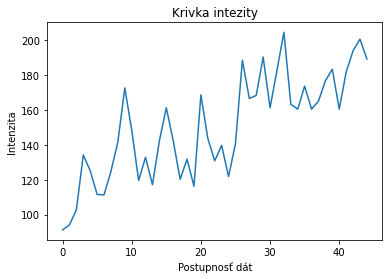

In [3]:
plt.plot(brigthness_data.index, brigthness_data.ARP)
plt.xlabel('Postupnosť dát')
plt.ylabel('Intenzita')
plt.title('Krivka intezity')
plt.show()

# plt.plot(brigthness_data.index, brigthness_data.RMS)
# plt.xlabel = 'index'
# plt.ylabel = 'RMS'
# plt.title('Index X RMS')
# plt.show()

## Pixel gradient 

### Gradient orientation math 
https://stackoverflow.com/questions/19815732/what-is-the-gradient-orientation-and-gradient-magnitude
### Sobel examople (scikit)
https://stackoverflow.com/questions/49732726/how-to-compute-the-gradients-of-image-using-python
### Gradient orientation with image color fulfuilling
https://stackoverflow.com/questions/51667520/gradient-orientation-in-opencv


In [6]:
# # Numpy gradient of image
# gx, gy = np.gradient(img)

# # Sobel horizontal and vertical edges from SCIKIT
# from skimage import filters

# gradient_x = filters.sobel_v(img)
# gradient_y = filters.sobel_h(img)
# gradient_orientation = cv2.phase(np.array(gradient_x, np.float32), np.array(gradient_y, np.float32), angleInDegrees=True)
# gradient_orientation

In [31]:
img = images[13]['img']
print(img.shape)

(787, 1093)


In [2]:
for img in images:

    # sobel_x = np.array([
    #     [ -1, 0, 1], 
    #     [ -2, 0, 2], 
    #     [ -1, 0, 1]
    #                    ])
    # sobel_y = np.array([
    #     [ -1, -2, -1],
    #     [ 0, 0, 0], 
    #     [ 1, 2, 1]
    #     ])

    sobel_x = np.array([
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ])

    sobel_y = np.array([
        [ 1, 2, 1],
        [ 0, 0, 0], 
        [ -1, -2, -1]
        ])

    # sobel_x = np.array([
    #     [1, 0, -1]
    # ])

    # sobel_y = np.array([
    #     [1],
    #     [0], 
    #     [-1]
    #     ])


    gradient_x = cv2.filter2D(img['img'], -1, sobel_x)  
    gradient_y = cv2.filter2D(img['img'], -1, sobel_y)

    gradient_orientation = cv2.phase(np.array(gradient_x, np.float32), np.array(gradient_y, dtype=np.float32), angleInDegrees=True)

    image_map = np.zeros((gradient_orientation.shape[0], gradient_orientation.shape[1], 3), dtype=np.int16)

    red = np.array([255, 0, 0])
    blue = np.array([0, 0, 255])
    green = np.array([0, 255, 0])

    blue_count = 0
    red_count = 0
    green_count = 0

    # for i in range(0, image_map.shape[0]):
    #     for j in range(0, image_map.shape[1]):
    #         if gradient_orientation[i][j] == 0.0 or gradient_orientation[i][j] == 180.0:
    #             image_map[i, j, :] = red
    #             red_count += 1
    #         elif gradient_orientation[i][j] == 90.0 or gradient_orientation[i][j] == 270.0:
    #             image_map[i, j, :] = blue
    #             blue_count += 1
    #         else:
    #             image_map[i, j, :] = green
    #             green_count += 1
    for i in range(0, image_map.shape[0]):
        for j in range(0, image_map.shape[1]):
            if (gradient_orientation[i][j] >= 0.0 and gradient_orientation[i][j] <= 20.0) or (gradient_orientation[i][j] >= 160.0 and gradient_orientation[i][j] <= 200.0):
                image_map[i, j, :] = red
                red_count += 1
            elif (gradient_orientation[i][j] >= 70.0 and gradient_orientation[i][j] <= 110.0) or (gradient_orientation[i][j] >= 250.0 and gradient_orientation[i][j] <= 290.0):
                image_map[i, j, :] = blue
                blue_count += 1
            else:
                image_map[i, j, :] = green
                green_count += 1

    print(f"Image: {img['name']} -> blue_count: {blue_count}, red_count: {red_count}, green_count {green_count}")
print('Color explanation')
print('Red - Angle (horizontal) [0-20, 160-200]')
print('Blue - Angle (vertical) [70-110, 250-290]')
print('Green - Angle (chaotic) other angles')

Image: 01.png -> blue_count: 225045, red_count: 474246, green_count 167107
Image: 02.png -> blue_count: 194120, red_count: 405536, green_count 143822
Image: 03.png -> blue_count: 221931, red_count: 467192, green_count 159949
Image: 04.png -> blue_count: 269811, red_count: 505699, green_count 180464
Image: 05.png -> blue_count: 254132, red_count: 424542, green_count 171308
Image: 06.png -> blue_count: 239440, red_count: 439442, green_count 170760
Image: 07.png -> blue_count: 221902, red_count: 451874, green_count 163462
Image: 08.png -> blue_count: 217204, red_count: 460377, green_count 158954
Image: 09.png -> blue_count: 209881, red_count: 459083, green_count 151726
Image: 10.png -> blue_count: 199756, red_count: 460975, green_count 130775
Image: 11.png -> blue_count: 222708, red_count: 539910, green_count 122606
Image: 12.png -> blue_count: 197584, red_count: 423363, green_count 141373
Image: 13.png -> blue_count: 226857, red_count: 452432, green_count 159261
Image: 14.png -> blue_cou

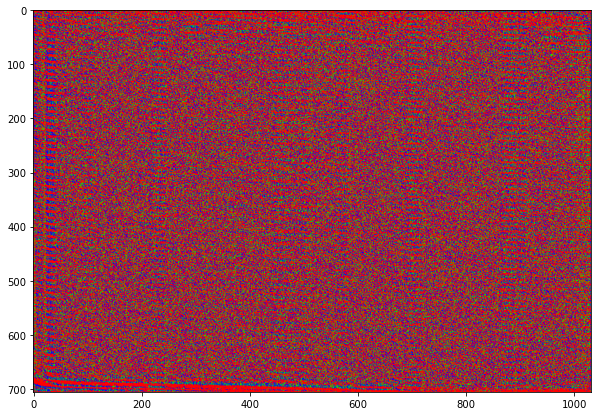

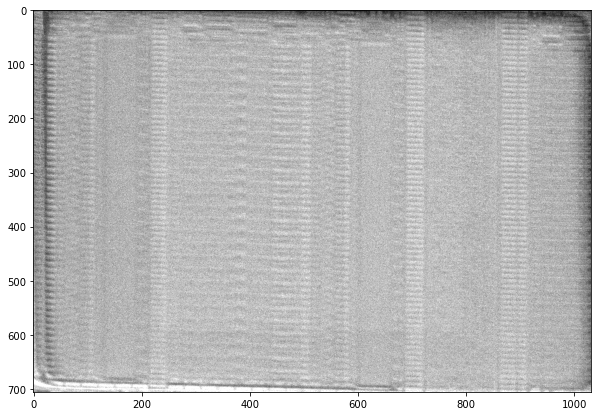

In [72]:
plt.figure(figsize=(10,10))
plt.imshow(image_map)
plt.title = 'Image with color as gradient'
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(images[-1]['img'], cmap='gray')
plt.title = 'Original image'
plt.show()

In [ ]:
import skimage.io
from matplotlib import pyplot as plt

image = np.array(image_map)

skimage.io.imshow(image)
histogram, bin_edges = np.histogram(image, bins=256, range=(np.min(image), np.max(image)))

plt.figure(figsize=(10,10))
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([np.min(image), np.max(image)])

plt.plot(bin_edges[0:-1], histogram)
plt.show()

In [105]:
def calc_gradient(img):
	gradient_values_x = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)
	cv2.convertScaleAbs(gradient_values_x)

	gradient_values_y = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3)
	cv2.convertScaleAbs(gradient_values_y)

	gradient_magnitude = cv2.addWeighted(gradient_values_x, 0.5, gradient_values_y, 0.5, 0)
	gradient_angle = cv2.phase(gradient_values_x, gradient_values_y, angleInDegrees=True)
	return gradient_magnitude, gradient_angle

for img in images:
    gradient_mag, gradient_orientation = calc_gradient(img['img'])
    image_map = np.zeros((gradient_orientation.shape[0], gradient_orientation.shape[1], 3), dtype=np.int16)

    red = np.array([255, 0, 0])
    blue = np.array([0, 0, 255])
    green = np.array([0, 255, 0])

    blue_count = 0
    red_count = 0
    green_count = 0

    for i in range(0, image_map.shape[0]):
        for j in range(0, image_map.shape[1]):
            if (gradient_orientation[i][j] >= 0.0 and gradient_orientation[i][j] <= 20.0) or (gradient_orientation[i][j] >= 160.0 and gradient_orientation[i][j] <= 200.0):
                image_map[i, j, :] = red
                red_count += 1
            elif (gradient_orientation[i][j] >= 70.0 and gradient_orientation[i][j] <= 110.0) or (gradient_orientation[i][j] >= 250.0 and gradient_orientation[i][j] <= 290.0):
                image_map[i, j, :] = blue
                blue_count += 1
            else:
                image_map[i, j, :] = green
                green_count += 1

    print(f"Image: '{img['name']}' -> blue_count: {blue_count}, red_count: {red_count}, green_count: {green_count},")

print('Color explanation')
print('Red - Angle (horizontal) [0-20, 160-200]')
print('Blue - Angle (vertical) [70-110, 250-290]')
print('Green - Angle (chaotic) other angles')


Image: '01.png' -> blue_count: 207615, red_count: 139421, green_count: 519362,
Image: '02.png' -> blue_count: 199464, red_count: 106613, green_count: 437401,
Image: '03.png' -> blue_count: 288907, red_count: 100564, green_count: 459601,
Image: '04.png' -> blue_count: 452817, red_count: 83171, green_count: 419986,
Image: '05.png' -> blue_count: 376185, red_count: 73341, green_count: 400456,
Image: '06.png' -> blue_count: 309846, red_count: 87994, green_count: 451802,
Image: '07.png' -> blue_count: 230082, red_count: 119271, green_count: 487885,
Image: '08.png' -> blue_count: 173227, red_count: 162340, green_count: 500968,
Image: '09.png' -> blue_count: 134377, red_count: 204293, green_count: 482020,
Image: '10.png' -> blue_count: 92635, red_count: 282134, green_count: 416737,
Image: '11.png' -> blue_count: 100539, red_count: 358410, green_count: 426275,
Image: '12.png' -> blue_count: 181518, red_count: 134760, green_count: 446042,
Image: '13.png' -> blue_count: 291616, red_count: 116041

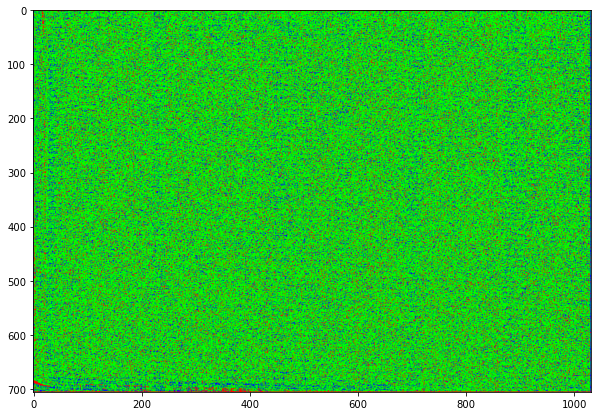

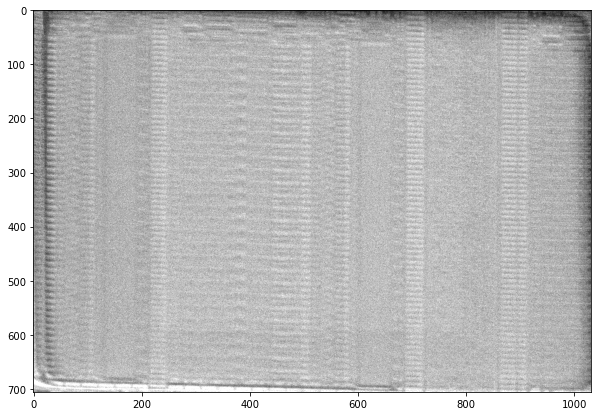

In [74]:
plt.figure(figsize=(10,10))
plt.imshow(image_map)
plt.title = 'Image with color as gradient'
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(images[-1]['img'], cmap='gray')
plt.title = 'Original image'
plt.show()

## Hessian

PyDIPjavaio unavailable:
dlopen(/Users/matho/opt/anaconda3/lib/python3.7/site-packages/diplib/PyDIPjavaio.cpython-37m-darwin.so, 0x0002): Library not loaded: @rpath/libjvm.dylib
  Referenced from: /Users/matho/opt/anaconda3/lib/python3.7/site-packages/diplib/libDIPjavaio.dylib
  Reason: tried: '/Users/matho/opt/anaconda3/lib/python3.7/site-packages/diplib/libjvm.dylib' (no such file), '/Users/runner/hostedtoolcache/Java_Adopt_jdk/8.0.302-8/x64/Contents/Home/jre/lib/server/libjvm.dylib' (no such file), '/Users/matho/opt/anaconda3/lib/python3.7/site-packages/diplib/libjvm.dylib' (no such file), '/Users/matho/opt/anaconda3/lib/python3.7/site-packages/diplib/libjvm.dylib' (no such file), '/Users/matho/opt/anaconda3/lib/libjvm.dylib' (no such file), '/Users/matho/opt/anaconda3/lib/libjvm.dylib' (no such file), '/Users/matho/opt/anaconda3/bin/../lib/libjvm.dylib' (no such file), '/Users/matho/opt/anaconda3/lib/libjvm.dylib' (no such file), '/Users/matho/opt/anaconda3/lib/libjvm.dylib' (no su

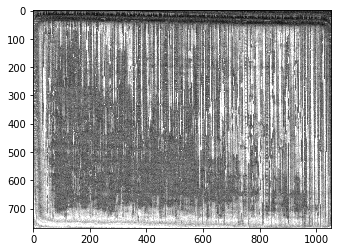

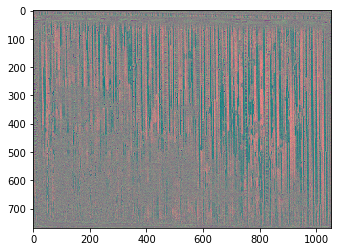

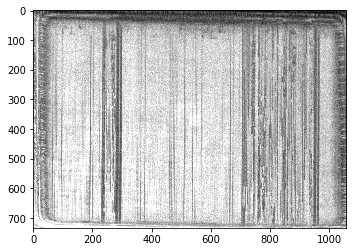

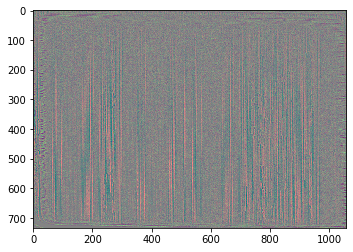

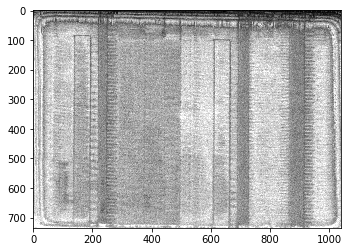

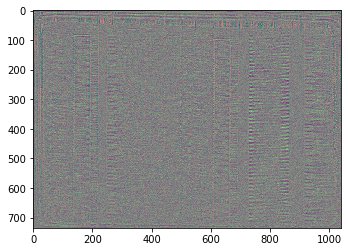

In [6]:
import diplib as dip
img = dip.Image(images[6]['img']) 
img.Show()

H = dip.Hessian(img)
H.Show()

img = dip.Image(images[29]['img']) # RED and have horizontal
img.Show()

H = dip.Hessian(img)
H.Show()

img = dip.Image(images[26]['img']) # BLUE and have vertical
img.Show()

H = dip.Hessian(img)
H.Show()

## Diplib StructureTensor


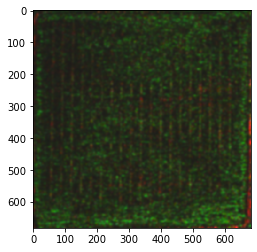

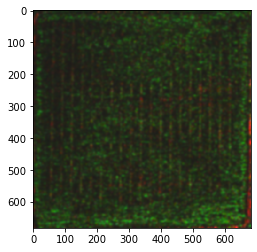

In [26]:
import diplib
image = dip.Image(img)
tensor_size = 5


image_gradient = diplib.Gradient(image)
I = image_gradient * diplib.Transpose(image_gradient)
S = diplib.Gauss(I, tensor_size)


DIPlib -- a quantitative image analysis library
Version 3.1.0 (Sep 24 2021)
For more information see https://diplib.org
Original image: 04_False_2.png, Shape: (506, 996)


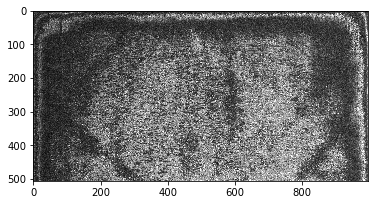

Eigenvalues 'diagonal matrix' Shape:(506, 996, 2)
Eigenvectors 'column-major matrix' Shape:(506, 996, 4)
First EigenVector (506, 996, 2)
Second EigenVector (506, 996, 2)


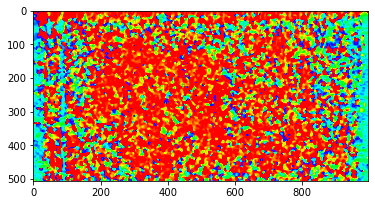

In [2]:
import diplib as dip

# img_dict = images[29] # RED, horizontal (metal)
# img_dict = images[6] # (insulator)
img_dict = images[2] # BLUE, vertical (metal)

name = img_dict['name']
img = img_dict['img']
print(f'Original image: {name}, Shape: {img.shape}')

tensor_sigma = 3
img = dip.Image(img) 
img.Show()

S = dip.StructureTensor(img, tensorSigmas=tensor_sigma)
eigenvalues, eigenvectors = dip.EigenDecomposition(S)
print(f"Eigenvalues '{eigenvalues.TensorShape()}' Shape:{np.array(eigenvalues).shape}")
print(f"Eigenvectors '{eigenvectors.TensorShape()}' Shape:{np.array(eigenvectors).shape}")

v1 = eigenvectors.TensorColumn(0)
v2 = eigenvectors.TensorColumn(1)
print("First EigenVector", np.array(v1).shape)
print("Second EigenVector", np.array(v2).shape)

angle = dip.Angle(v1)
angle.Show('orientation')


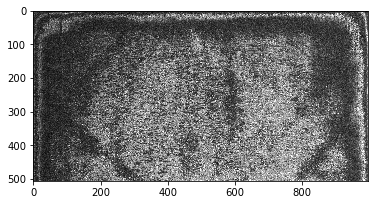

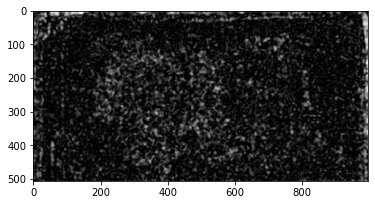

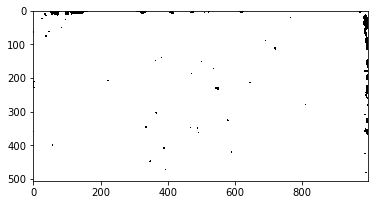

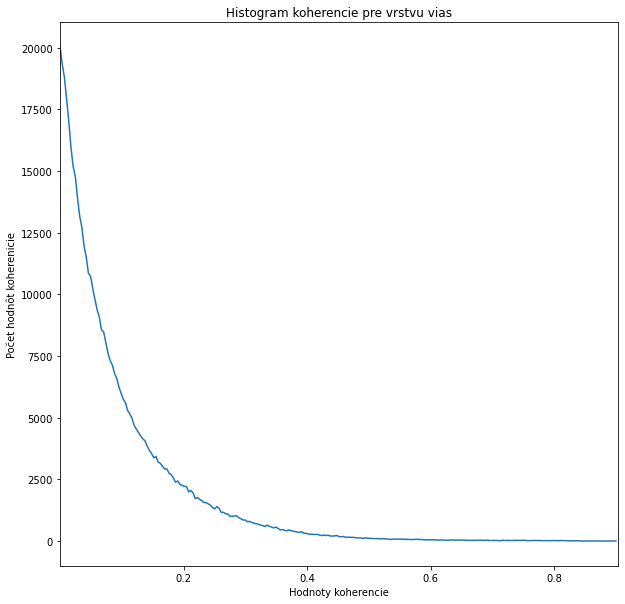

In [6]:
img.Show()

anisotropy1 = (eigenvalues(0) - eigenvalues(1)) / (eigenvalues(0) + eigenvalues(1))
coherence = ((eigenvalues(0) - eigenvalues(1)) / (eigenvalues(0) + eigenvalues(1)))**2
coherence.Show()

abs = np.abs(np.array(coherence))
mask = np.where(abs > 0.5, 0, 1)

thershold = dip.Image(mask)
thershold.Show()

image = abs
histogram, bin_edges = np.histogram(image, bins=256, range=(np.min(image), np.max(image)))

plt.figure(figsize=(10,10))
plt.title("Histogram koherencie pre vrstvu vias")#kovových vodičov
plt.xlabel("Hodnoty koherencie")
plt.ylabel("Počet hodnôt koherenicie")
plt.xlim([np.min(image), np.max(image)])

plt.plot(bin_edges[0:-1], histogram)
plt.show()

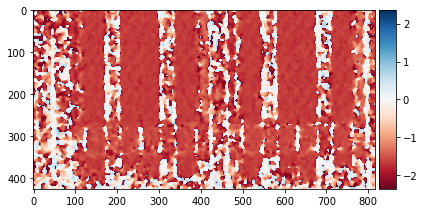

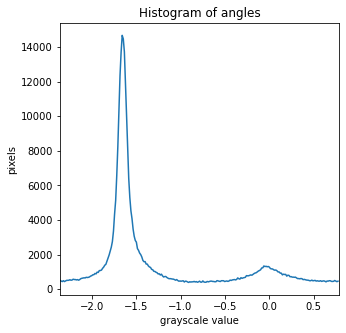

Index: (array([57], dtype=int64),), Value: 14679 Bin [-1.656699]


In [41]:
image = np.array(angle)

skimage.io.imshow(image)
histogram, bin_edges = np.histogram(image, bins=256, range=(np.min(image), np.max(image)))

plt.figure(figsize=(5,5))
plt.title("Histogram of angles")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([np.min(image), np.max(image)])
plt.plot(bin_edges[0:-1], histogram)
plt.show()

# for item in range(len(histogram)):
#     print(f'{histogram[item]} {bin_edges[item]}')

max = np.amax(histogram)
result = np.where(histogram == max)
print(f"Index: {result}, Value: {max} Bin {bin_edges[result[0]]}")

### Color range for Show('orientation')

(20, 20)


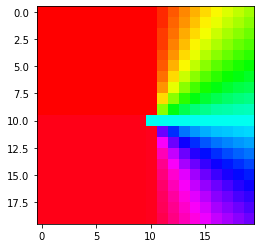

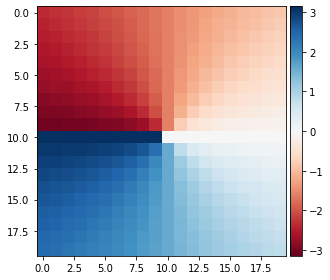

In [36]:
x,y = np.meshgrid(range(-10,10), range(-10,10))
color_image = np.arctan2(y,x)
print(color_image.shape)

img_dip = dip.Image(color_image)
img_dip.Show('orientation')

skimage.io.imshow(color_image)

#   .